#Analysis of UCI Mushroom dataset from https://archive.ics.uci.edu/ml/dataset to explore whether certain features—specifically odor and cap color—can help predict whether a mushroom is edible or poisonous.

In [1]:
>>> import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Load dataset directly from UCI repository

In [2]:
>>> url = "https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data"
columns = [
    "class", "cap-shape", "cap-surface", "cap-color", "bruises", "odor",
    "gill-attachment", "gill-spacing", "gill-size", "gill-color", "stalk-shape",
    "stalk-root", "stalk-surface-above-ring", "stalk-surface-below-ring",
    "stalk-color-above-ring", "stalk-color-below-ring", "veil-type", "veil-color",
    "ring-number", "ring-type", "spore-print-color", "population", "habitat"
]
df = pd.read_csv(url, header=None, names=columns, sep=",", na_values="?")
print(df.head())

  class cap-shape cap-surface cap-color bruises odor gill-attachment  \
0     p         x           s         n       t    p               f   
1     e         x           s         y       t    a               f   
2     e         b           s         w       t    l               f   
3     p         x           y         w       t    p               f   
4     e         x           s         g       f    n               f   

  gill-spacing gill-size gill-color  ... stalk-surface-below-ring  \
0            c         n          k  ...                        s   
1            c         b          k  ...                        s   
2            c         b          n  ...                        s   
3            c         n          n  ...                        s   
4            w         b          k  ...                        s   

  stalk-color-above-ring stalk-color-below-ring veil-type veil-color  \
0                      w                      w         p          w   
1       

#Select and rename relevant colums

In [3]:
>>> df_subset = df[["class", "odor", "cap-color"]].copy()
df_subset.columns = ["edibility", "odor", "cap_color"]
df_subset["edibility"] = df_subset["edibility"].astype(str).str.strip()
df_subset["edibility"] = df_subset["edibility"].map({"e": 0, "p": 1})
print(df_subset["edibility"].value_counts(dropna=False))

0    4208
1    3916
Name: edibility, dtype: int64


#Map odor to numeric codes

In [4]:
>>> odor_mapping = {val: idx for idx, val in enumerate(sorted(df_subset["odor"].unique()))}
df_subset["odor"] = df_subset["odor"].map(odor_mapping)

#Map cap_color to numeric codes

In [5]:
>>> cap_color_mapping = {val: idx for idx, val in enumerate(sorted(df_subset["cap_color"].unique()))}
df_subset["cap_color"] = df_subset["cap_color"].map(cap_color_mapping)

df_subset.head()

,edibility,odor,cap_color
0,1,6,4
1,0,0,9
2,0,3,8
3,1,6,8
4,0,5,3


#Plot distributions

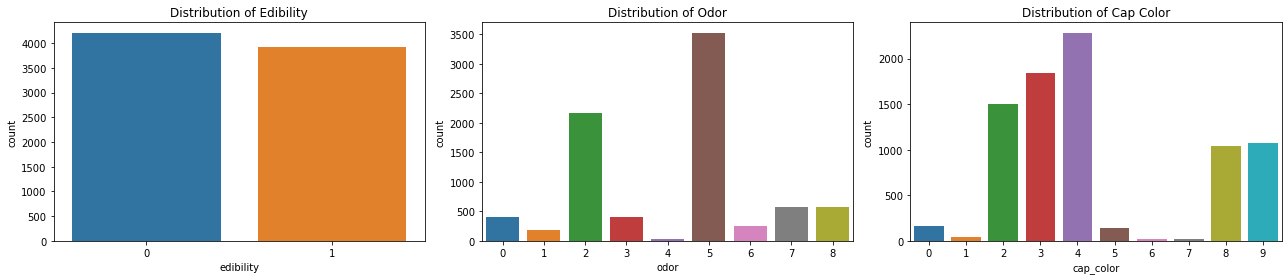

In [6]:
>>> fig, axes = plt.subplots(1, 3, figsize=(18, 4))

sns.countplot(x="edibility", data=df_subset, ax=axes[0])
axes[0].set_title("Distribution of Edibility")

sns.countplot(x="odor", data=df_subset, ax=axes[1])
axes[1].set_title("Distribution of Odor")

sns.countplot(x="cap_color", data=df_subset, ax=axes[2])
axes[2].set_title("Distribution of Cap Color")

plt.tight_layout()
plt.show()

#Grouped count plot: Odor versus Edibility

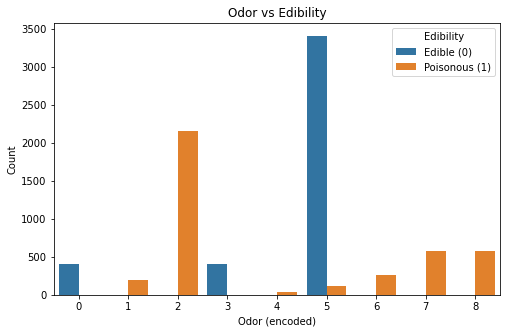

In [7]:
>>> plt.figure(figsize=(8, 5))
sns.countplot(x="odor", hue="edibility", data=df_subset)
plt.title("Odor vs Edibility")
plt.xlabel("Odor (encoded)")
plt.ylabel("Count")
plt.legend(title="Edibility", labels=["Edible (0)", "Poisonous (1)"])
plt.show()

#Grouped count plot: Edibility versus Cap Color

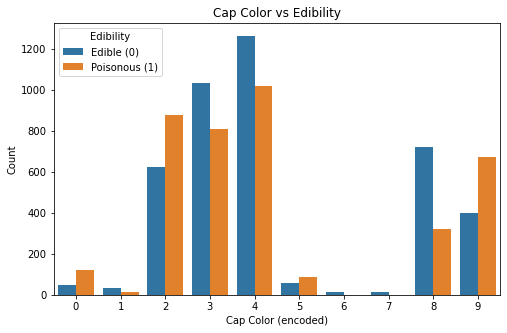

In [8]:
>>> plt.figure(figsize=(8, 5))
sns.countplot(x="cap_color", hue="edibility", data=df_subset)
plt.title("Cap Color vs Edibility")
plt.xlabel("Cap Color (encoded)")
plt.ylabel("Count")
plt.legend(title="Edibility", labels=["Edible (0)", "Poisonous (1)"])
plt.show()

#Conclusion: Based on the grouped plot results, odor appears to be a strong indicator of edibility. 
Certain odor codes are almost exclusively associated with poisonous mushrooms.Cap color shows a more mixed pattern, suggesting it may be less predictive on its own.
Combining odor with other features could improve classification accuracy in a machine learning model.